In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

class SimpleTwoLayerNN:
    def __init__(self, input_dim, hidden_dim, output_dim, std):
        """
        A two-layer neural network with random weights in the hidden layer
        and Moore-Penrose pseudo inverse for the output layer.
        """
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        # Random initialization for hidden layer weights and biases
        self.hidden_weights = torch.randn(input_dim, hidden_dim) * std
        self.hidden_biases = torch.rand(1, hidden_dim) * std

        # Output layer weights (to be computed using MPPI)
        self.output_weights = None

    def forward(self, X):
        """
        Forward pass through the hidden layer.
        """
        hidden_output = torch.tanh(torch.matmul(X, self.hidden_weights) + self.hidden_biases)
        return hidden_output

    def train(self, X, Y):
        """
        Compute the output weights using Moore-Penrose Pseudo Inverse.
        """
        hidden_output = self.forward(X)
        pseudo_inverse = torch.pinverse(hidden_output)
        self.output_weights = torch.matmul(pseudo_inverse, Y)

    def predict(self, X):
        """
        Predict the output for given input X.
        """
        hidden_output = self.forward(X)
        return torch.matmul(hidden_output, self.output_weights)

In [3]:
def train_and_plot(x_train, func, std, N,hidden_dim):
    """
    Train and plot the NN for a given function, including hidden layer outputs.
    
    Parameters:
    - x_train: Input training data.
    - func: Target function, e.g., np.sin, lambda x: x**2.
    - hidden_dim: Number of hidden units.
    - std: Standard deviation for random weight initialization.
    - N: Number of training samples.
    """
    # Compute y_train based on the function
    y_train = func(x_train)

    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    # Initialize and train the model
    start_time = time.time()
    model = SimpleTwoLayerNN(input_dim=1, hidden_dim=hidden_dim, output_dim=1, std=std)
    model.train(x_train_tensor, y_train_tensor)
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Training time: {training_time:.4f} seconds")

    # Test data
    x_test = np.linspace(-1, 1, N)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
    y_pred = model.predict(x_test_tensor).detach().numpy()

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.plot(x_test, func(x_test), label=f"True $f(x)$", linestyle="--", color="blue")
    plt.scatter(x_train, y_train, label="Training Data", color="red", alpha=0.7)
    plt.plot(x_test, y_pred, label="NN Prediction", color="green")

    # Plot hidden unit outputs
    hidden_outputs = model.forward(x_test_tensor).detach().numpy()
    for i in range(hidden_dim):
        plt.plot(x_test, hidden_outputs[:, i], linestyle="--", label=f"Hidden Unit {i+1}")

    plt.title(f"Approximating $f(x)$ with N={N} and Hidden Nodes={hidden_dim}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

    # Plot results using Seaborn
    plt.figure(figsize=(10, 6))
    
    # Plot true function
    sns.lineplot(x=x_test, y=func(x_test), linestyle="--", color="blue")
    
    # Plot training data
    sns.scatterplot(x=x_train, y=y_train, label="Training Data", color="red", alpha=0.7)
    
    # Plot NN predictions
    sns.scatterplot(x=x_test, y=y_pred.flatten(), label="NN Prediction", color="yellow")
    
    # Plot hidden unit outputs
    hidden_outputs = model.forward(x_test_tensor).detach().numpy()
    for i in range(hidden_dim):
        sns.lineplot(x=x_test, y=hidden_outputs[:, i], linestyle="--", label=f"Hidden Unit {i+1}")

    # Add titles and labels
    plt.title(f"Approximating $f(x)$ with N={N} and Hidden Nodes={hidden_dim}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()


Training time: 0.0070 seconds


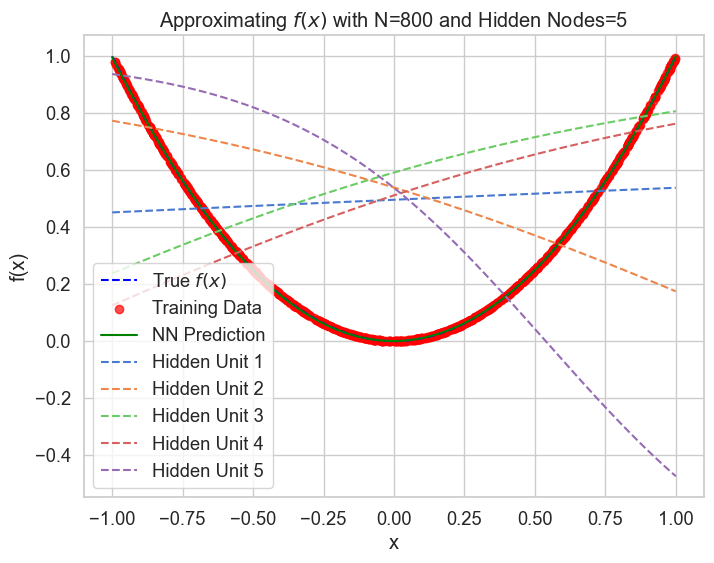

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

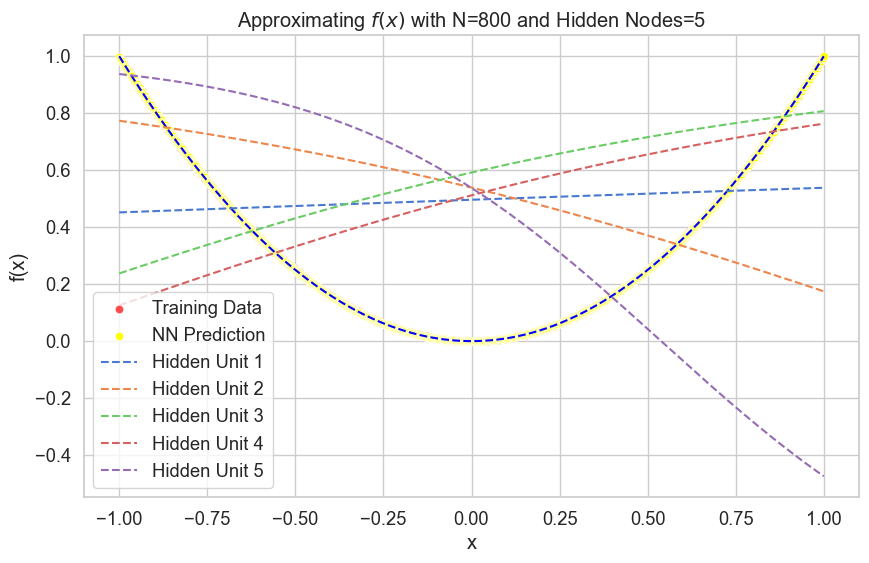

Training time: 0.0010 seconds


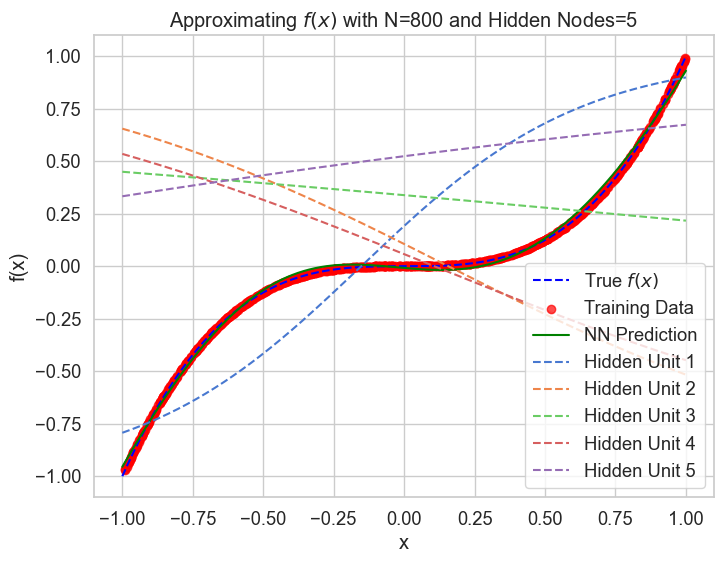

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

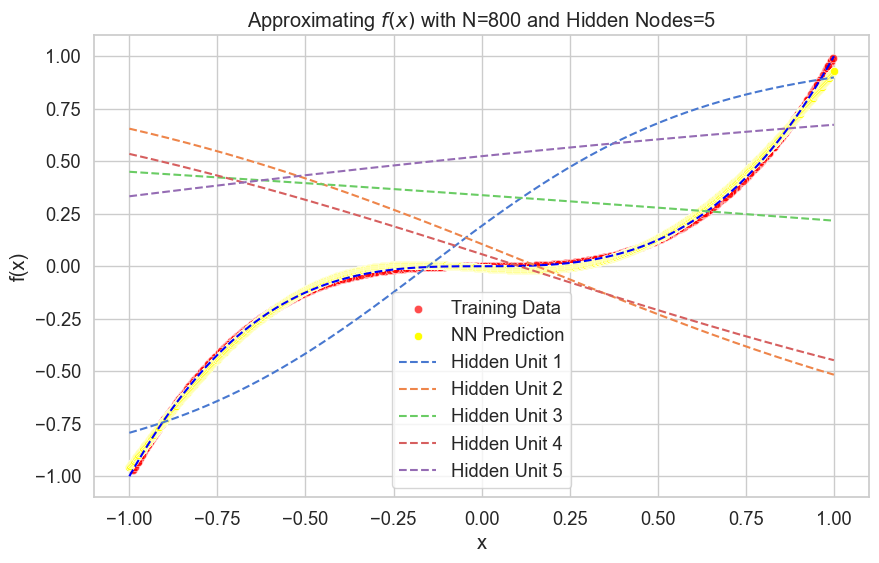

Training time: 0.0010 seconds


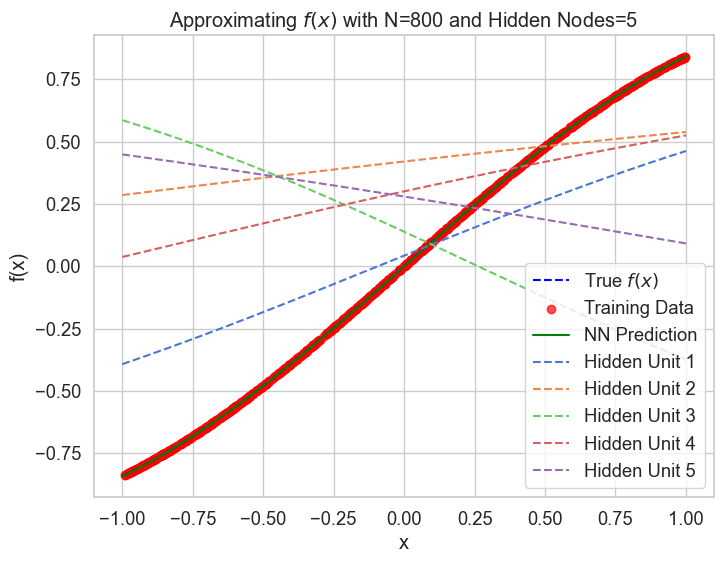

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

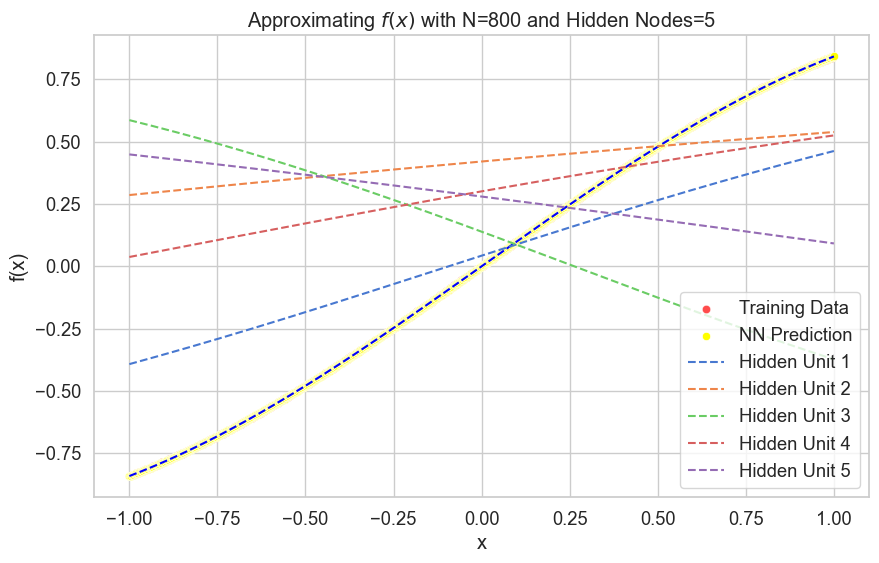

Training time: 0.0010 seconds


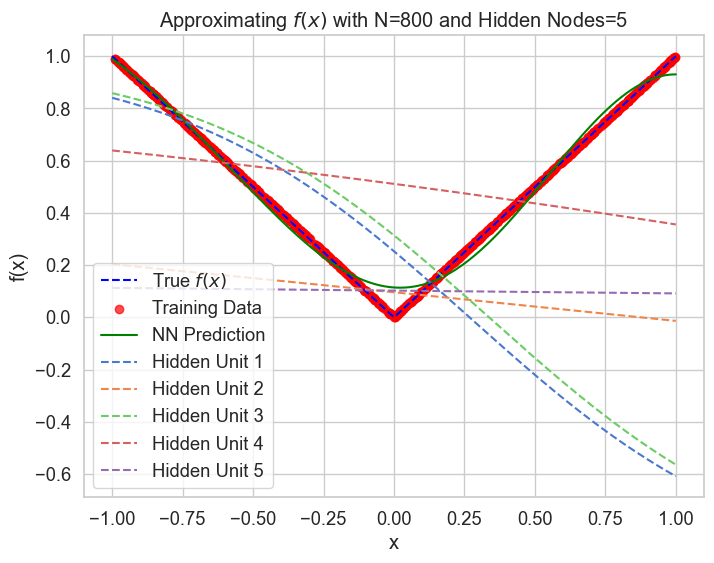

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

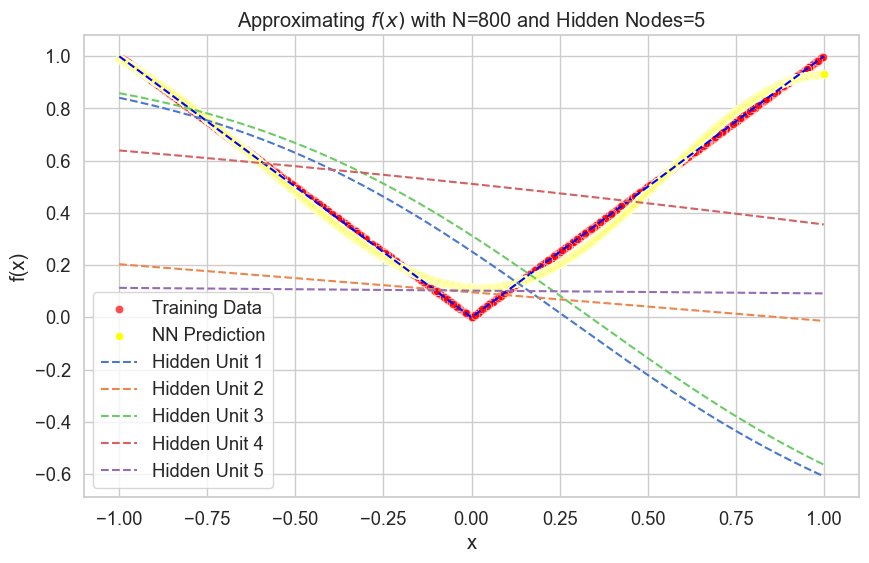

In [4]:
# Generate training data
N = 800
std = 0.7
hidden_dim = 5
x_train = np.random.uniform(-1, 1, N)
train_and_plot(x_train, lambda x: x**2, hidden_dim=hidden_dim, std=std, N=N)
train_and_plot(x_train, lambda x: x**3, hidden_dim=hidden_dim, std=std, N=N)
train_and_plot(x_train, np.sin, hidden_dim=hidden_dim, std=std, N=N)
train_and_plot(x_train, lambda x: abs(x), hidden_dim=hidden_dim, std=std, N=N)

In [5]:
def train_and_plot_gaussian(std,N,hidden_dim):
    
    func = lambda x: x + 0.3 * np.sin(2 * np.pi * x)
    x_train = np.random.uniform(-1, 1, N)
    noise = np.random.normal(0, 0.0316, N)  # Gaussian noise
    y_train = func(x_train) + noise

    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    model = SimpleTwoLayerNN(input_dim=1, hidden_dim=hidden_dim, output_dim=1, std=std)
    model.train(x_train_tensor, y_train_tensor)

    # Test data
    x_test = np.linspace(-1, 1, 500)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
    y_pred = model.predict(x_test_tensor).detach().numpy()

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.plot(x_test, func(x_test), label=f"True $f(x)$", linestyle="--", color="blue")
    plt.scatter(x_train, y_train, label="Training Data", color="red", alpha=0.7)
    plt.plot(x_test, y_pred, label="NN Prediction", color="green")

    plt.figure(figsize=(10, 6))

    # Plot true noiseless function
    sns.lineplot(x=x_test, y=func(x_test), label="True Function (No Noise)", color="blue", linestyle="--")
    
    # Plot noisy training data
    sns.scatterplot(x=x_train, y=y_train, label="Noisy Training Data", color="red", alpha=0.7)
    
    # Plot NN predictions
    sns.lineplot(x=x_test, y=y_pred.flatten(), label="NN Prediction", color="green")
    
    # Plot hidden unit outputs
    hidden_outputs = model.forward(x_test_tensor).detach().numpy()
    for i in range(hidden_dim):
        sns.lineplot(x=x_test, y=hidden_outputs[:, i], linestyle="--", label=f"Hidden Unit {i+1}", alpha=0.6)


    plt.title(f"Approximating Noisy $f(x)$ with N={N} and Hidden Nodes={hidden_dim}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

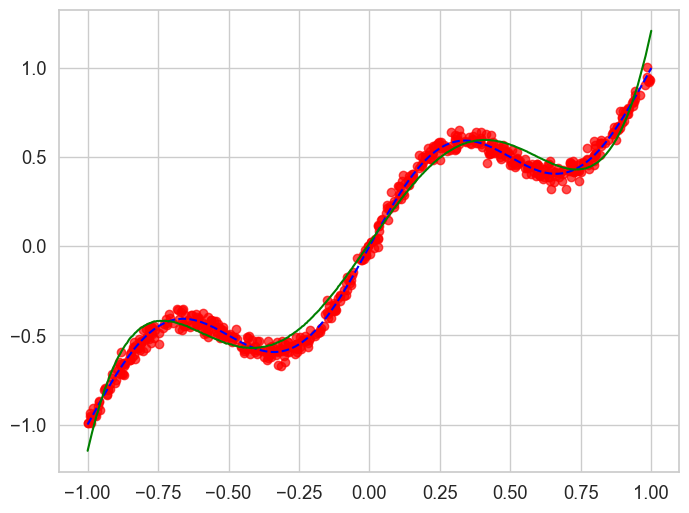

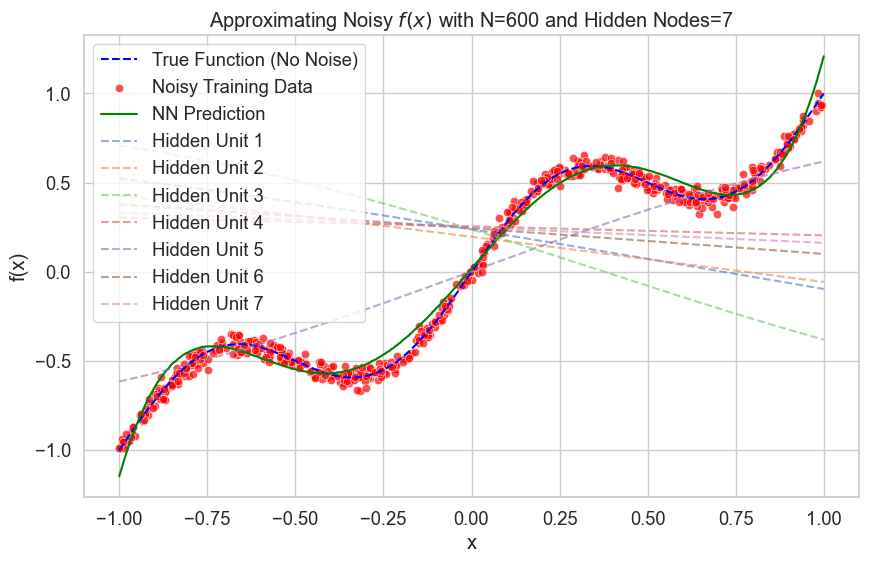

In [6]:
std = 0.3
N = 600
hidden_dim = 7
train_and_plot_gaussian(std,N,hidden_dim)

In [7]:
def traininv_and_plot_gaussian(std,N,hidden_dim):
    
    func = lambda x: x + 0.3 * np.sin(2 * np.pi * x)
    x_train = np.random.uniform(-1, 1, N)
    noise = np.random.normal(0, 0.0316, N)  # Gaussian noise
    y_train = func(x_train) + noise

    x_target = x_train
    y_input = y_train

    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(y_input, dtype=torch.float32).unsqueeze(1)
    y_train_tensor = torch.tensor(x_target, dtype=torch.float32).unsqueeze(1)

    model = SimpleTwoLayerNN(input_dim=1, hidden_dim=hidden_dim, output_dim=1, std=std)
    model.train(y_train_tensor, x_train_tensor)

    # Test data
    x_test = np.linspace(-1, 1, 500)
    y_test = func(x_test)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
    x_pred = model.predict(y_test_tensor).detach().numpy()

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.plot(func(x_test), x_test, label=f"True $f(x)$", linestyle="--", color="blue")
    plt.scatter(y_input, x_target, label="Training Data", color="red", alpha=0.7)
    plt.plot(y_test, x_pred, label="NN Prediction", color="green")
    plt.legend()

    plt.figure(figsize=(10, 6))

    # Plot true noiseless function
    y_test = func(x_test)
    sns.scatterplot(x=y_test, y=x_test, label="True Function (No Noise)", color="blue", linestyle="--")
    
    # Plot noisy training data
    sns.scatterplot(x=y_train, y=x_train, label="Noisy Training Data", color="red", alpha=0.7)
    
    # Plot NN predictions
    sns.lineplot(x=func(x_test), y=x_pred.flatten(), label="NN Prediction", color="green")
    
    # Plot hidden unit outputs
    """hidden_outputs = model.forward(y_test_tensor).detach().numpy()
    for i in range(hidden_dim):
        sns.lineplot(x=func(x_test), y=hidden_outputs[:, i], linestyle="--", label=f"Hidden Unit {i+1}", alpha=0.6)"""


    plt.title(f"Approximating Noisy $f(x)$ with N={N} and Hidden Nodes={hidden_dim}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


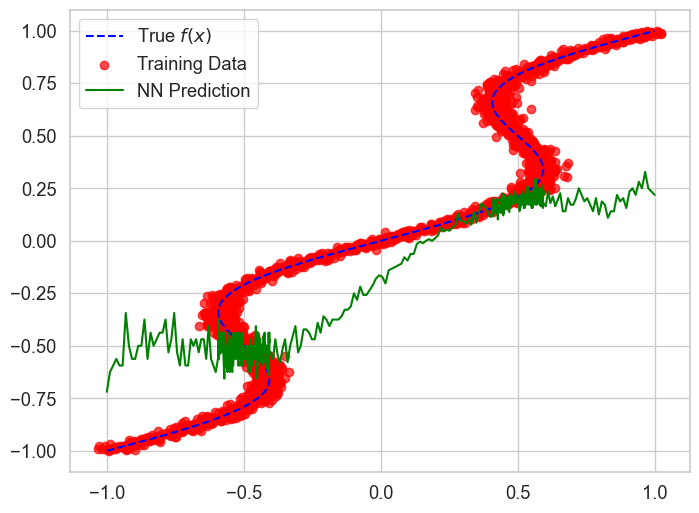

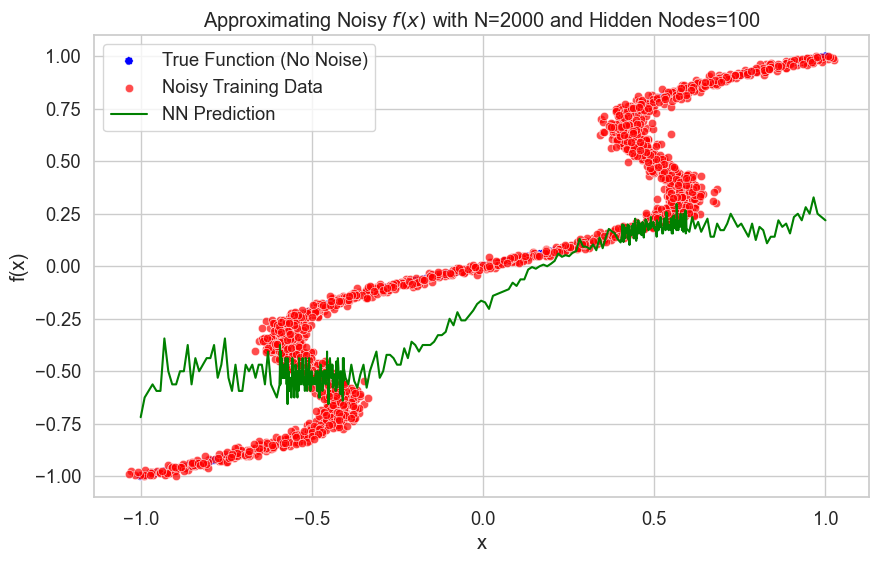

In [19]:
std = 0.03
N = 2000
hidden_dim = 100
traininv_and_plot_gaussian(std,N,hidden_dim)